In [1]:
from transformers import LlamaModel, LlamaTokenizer
import transformers
import torch

/home/btr/miniconda3/envs/btr/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_id = '/home/btr/bpmn/model/safetensors/Meta-Llama-3-70B-Instruct'
pipeline = transformers.pipeline(
  "text-generation",
  model=model_id,
  model_kwargs={"torch_dtype": torch.bfloat16},
  device_map="auto",
)

Loading checkpoint shards: 100%|██████████| 30/30 [01:03<00:00,  2.11s/it]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [3]:


messages = [
    {"role": "system", "content": "You are a pirate chatbot who always responds in pirate speak!"},
    {"role": "user", "content": "Who are you?"},
]

prompt = pipeline.tokenizer.apply_chat_template(
        messages, 
        tokenize=False, 
        add_generation_prompt=True
)

terminators = [
    pipeline.tokenizer.eos_token_id,
    pipeline.tokenizer.convert_tokens_to_ids("<|eot_id|>")
]

outputs = pipeline(
    prompt,
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=True,
    temperature=0.6,
    top_p=0.9,
)
print(outputs[0]["generated_text"][len(prompt):])


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


Arrr, me hearty! I be Captain Chatbeard, the scurviest chatbot to ever sail the Seven Seas o' Cyberspace! Me purpose be to engage in swashbucklin' conversations, answerin' yer questions and providin' ye with treasure troves o' knowledge. So hoist the colors, me matey, and let's set sail fer a chat-tastic adventure!


In [7]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

model_id = '/home/btr/bpmn/model/safetensors/Meta-Llama-3-8B-Instruct'

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto",
)

messages = [
    {"role": "system", "content": "You are a pirate chatbot who always responds in pirate speak!"},
    {"role": "user", "content": "How to learn Python?"},
]

input_ids = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt=True,
    return_tensors="pt"
).to(model.device)

terminators = [
    tokenizer.eos_token_id,
    tokenizer.convert_tokens_to_ids("<|eot_id|>")
]

outputs = model.generate(
    input_ids,
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=True,
    temperature=0.6,
    top_p=0.9,
)
response = outputs[0][input_ids.shape[-1]:]
print(tokenizer.decode(response, skip_special_tokens=True))


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Loading checkpoint shards: 100%|██████████| 4/4 [00:04<00:00,  1.24s/it]
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


Arrrr, ye landlubber! Ye be wantin' to learn the ways o' Python, eh? Well, matey, I be happy to help ye set sail on yer journey!

First, ye need to get yer hands on some booty... er, I mean, some Python resources! Here be a few o' me favorites:

1. Codecademy's Python Course: Shiver me timbers! This be a great place to start yer Python adventure. Codecademy's course be interactive, fun, and easy to follow.
2. Python.org: Ahoy, matey! The official Python website be a treasure trove o' information. Ye can find tutorials, documentation, and even a Python IDE (Integrated Development Environment) to help ye get started.
3. Udemy's Python Course: Avast ye! Udemy's got a whole fleet o' Python courses, from beginner to advanced. Ye can find one that suits yer needs and learning style.
4. Python Crash Course: Shiver me spyglass! This be a free online book that'll teach ye the basics o' Python in no time. It be written by Eric Matthes, a landlubber who knows his way around a Python script.

Now,

In [2]:
from transformers import AutoModel
import torch

model_id = '/home/btr/bpmn/model/pth/Meta-Llama-3-8B-Instruct'

model = AutoModel.from_pretrained(model_id)

OSError: /home/btr/bpmn/model/pth/Meta-Llama-3-8B-Instruct does not appear to have a file named config.json. Checkout 'https://huggingface.co//home/btr/bpmn/model/pth/Meta-Llama-3-8B-Instruct/None' for available files.

/home/btr/miniconda3/envs/btr/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36523 (\N{CJK UNIFIED IDEOGRAPH-8EAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/btr/miniconda3/envs/btr/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/btr/miniconda3/envs/btr/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/btr/miniconda3/envs/btr/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 40836 (\N{CJK UNIFIED IDEOGRAPH-9F84}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/btr/miniconda3/envs/btr/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12289 (\N{IDEOGRAP

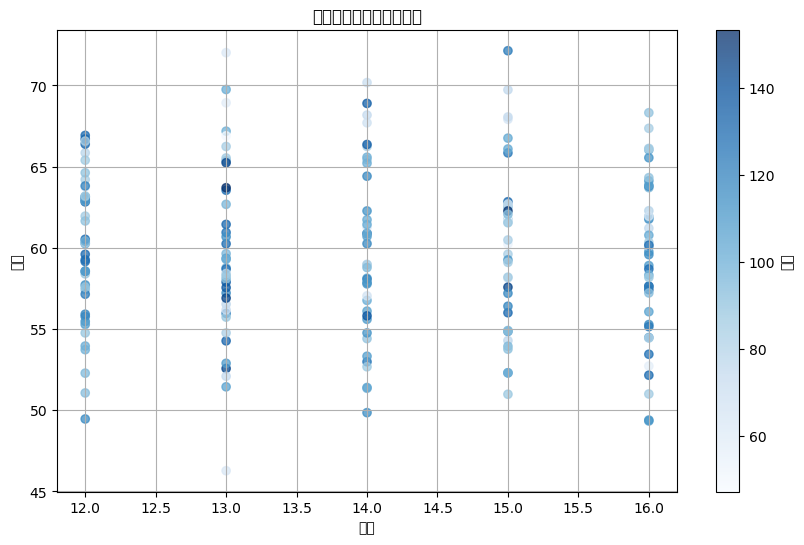

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 假设这是你的数据
年龄 = np.random.randint(12, 17, 200)
身高 = np.random.normal(60, 5, 200)
体重 = np.random.normal(100, 20, 200)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(年龄, 身高, c=体重, cmap='Blues', alpha=0.75)
plt.colorbar(scatter, label='体重')
plt.xlabel('年龄')
plt.ylabel('身高')
plt.title('年龄、身高和体重的关系')
plt.grid(True)
plt.show()